# No Show Appointments Analysis

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- **ScheduledDay: **  tells us on what day the patient set up their appointment.
- **Neighborhood: **  indicates the location of the hospital. 
- **Scholarship: **  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- **No-show: **  it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Data And Setup

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

sns.set_style('whitegrid')
%matplotlib inline

In [53]:
appointments = pd.read_csv('noshowappointments.csv')
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [54]:
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [55]:
appointments.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [56]:
#Lets Extract Month And Day From Appointment Date
appointments['AppointmentDay'] = pd.to_datetime(appointments['AppointmentDay'])
appointments['month'] =  appointments['AppointmentDay'].apply(lambda data : data.month) 
appointments['day_of_week'] = appointments['AppointmentDay'].apply(lambda data : data.dayofweek)

In [57]:
#Lets Drop The Following Columns As they Won't Much Useful For Analysis
appointments.drop(['PatientId','AppointmentID','ScheduledDay'], axis=1, inplace=True)
appointments.head(3)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,month,day_of_week
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4


## EDA

**1. How Many People Missed Their Appointments ?**

No     88208
Yes    22319
Name: No-show, dtype: int64




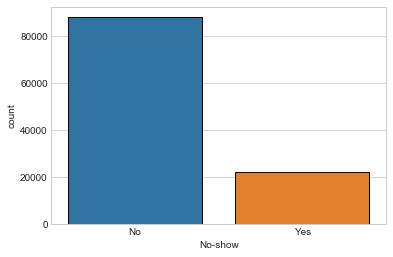

In [58]:
def print_stats(col, plot=False, hue=None):
    print(appointments[col].value_counts())
    if plot:
        print('\n')
        sns.countplot(data = appointments, x= col, hue=hue);
    
print_stats('No-show', plot=True)

**2. How Many People Are Alcoholic ?**

In [59]:
print_stats('Alcoholism')  

0    107167
1      3360
Name: Alcoholism, dtype: int64


**3. How Many People Are Diabetic ?**

In [60]:
print_stats('Diabetes')  

0    102584
1      7943
Name: Diabetes, dtype: int64


**4. How Many People Are Suffering From HyperTension ?**

In [61]:
print_stats('Hipertension')

0    88726
1    21801
Name: Hipertension, dtype: int64


**5. How Many People Received Sms ?**

In [62]:
print_stats('SMS_received')

0    75045
1    35482
Name: SMS_received, dtype: int64


**6. How Many People Have Scholarships ?**

In [63]:
print_stats('Scholarship')

0    99666
1    10861
Name: Scholarship, dtype: int64


**7. Gender Distribution**

F    71840
M    38687
Name: Gender, dtype: int64




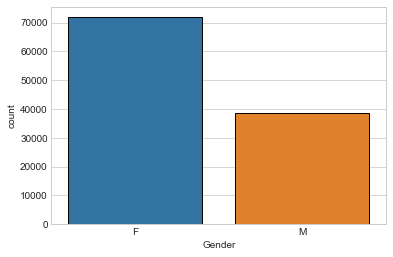

In [64]:
print_stats('Gender', plot=True)

**8. Age Distribution**

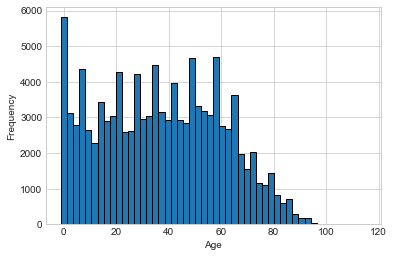

In [65]:
plt.hist(appointments['Age'], bins = 50)
plt.xlabel('Age')
plt.ylabel('Frequency');

**9. Distribution Of Appointments By Day Of The Week**

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: day_of_week, dtype: int64




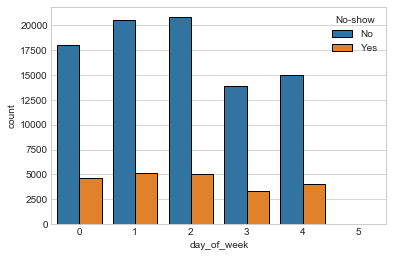

In [66]:
print_stats('day_of_week', plot=True, hue='No-show')

**10. Distribution Of Appointments By Month Of The Year**

5    80841
6    26451
4     3235
Name: month, dtype: int64




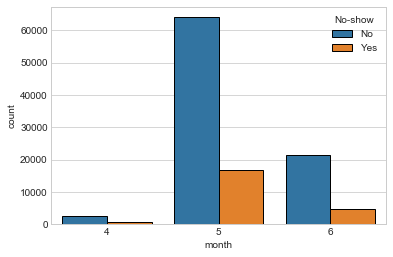

In [17]:
print_stats('month', plot=True, hue='No-show')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. import kn

In [45]:
appointments.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'month', 'day_of_week'],
      dtype='object')

In [46]:
def convertToInt(string):
    if string == 'No':
        return 1
    else:
        return 0
    
def convertGenderToNum(gender):
    if gender == 'M':
        return 1
    else :
        return 0

x = appointments.drop(['No-show', 'AppointmentDay','Neighbourhood'], axis=1)
y = appointments['No-show'].apply(convertToInt)

x['Gender'] = x['Gender'].apply(convertGenderToNum)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [26]:
x_train.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,month,day_of_week
66733,0,44,0,0,0,0,0,0,5,2
77363,0,68,0,1,0,0,0,0,5,2
25480,1,45,0,0,0,0,0,0,5,0
93223,1,67,0,0,0,0,0,1,6,0
22559,0,52,0,1,0,0,0,0,5,0


In [47]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
pred = model.predict(x_test)

In [49]:
accuracy_score(y_test, pred)

0.7775566211285021

In [50]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.29      0.08      0.13      6597
          1       0.81      0.95      0.87     26562

avg / total       0.70      0.78      0.72     33159



In [51]:
print(confusion_matrix(y_test, pred))

[[  550  6047]
 [ 1329 25233]]
